# Atmosphere Thermal (Jeans) Escape

Notebook to compute thermal (Jeans) escape of atoms and molecules from the atmosphere of a terrestrial planet.

We do the computation here for the Earth's exobase with T$_{exo}$=1000K.

In [7]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

#### Figure Filename

`figName` sets the figure filename of the form `Fig<chapterNum>_<figNum>`, the figure number may also 
include a lowercase  letter for a subfigure (e.g., Fig1_2a).  

#### Aspect Ratio

`aspect` sets the aspect ratio, width/height.  The default aspect ratio is 4:3, 1:1 for square plots, 
and 5:2 (2.5:1) for spectra, and equal aspect ratio for images and plots of Cartesian coordinates.
Use a formula instead of decimal when the result is a fraction (example: `aspect = 4.0/3.0` instead of
`aspect=1.33`).

In [8]:
figName = 'jeansEscape' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

aspect = 16.0/9.0 # widescreen

# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)


figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth
hInches = wInches/aspect
        
# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

# print a summary (uncomment as needed)

print(f'Filename: {plotFile}')
print(f'Size: {wInches:.2f} x {hInches:.2f}-in ({plotWidth} x {plotHeight} pix)')
print(f'Aspect Ratio: {aspect:.2f}:1')
print(f'Fonts: axes={axisFontSize:.1f} pt, intraplot labels={labelFontSize:.1f}')

Filename: jeansEscape.png
Size: 6.00 x 3.38-in (3600.0 x 2025.0 pix)
Aspect Ratio: 1.78:1
Fonts: axes=10.0 pt, intraplot labels=8.0


## Physical constants

From the NIST database of fundamental physical constants [physics.nist.gov/cuu/Constants/](https://physics.nist.gov/cuu/Constants/) which uses the CODATA18 values

In [9]:
k = 1.380649e-23 # J/K, exact definition from CODATA18

amu = 1.66053906660e-27 # atomic mass constant in kg

G = 6.67430e-11 # m3 kg-1 s-2, Newtonian gravitational constant

## Astronomical Constants

Useful astronomical constants from IAU 2015 Resolution B3 nominal solar and planetary quantities.

In [10]:
Re = 6378.1 # km - earth equatorial radius

GMe = 3.986004e14 # m3 s-2 Earth mass parameters

Me = GMe/G # in kg if we need it.

## Maxwell-Boltzmann distribution

### mbDist(v,mu,T)

Computes the Maxwell-Boltzmann distribution for all velocities v given $\mu$ and T.  

Parameters:
  * v - array of speeds to compute MB
  * mu - molecular weight of the species in amu (e.g., H<sub>2</sub> has $\mu$=2)
  * T - temperature in K
  
### mbSpeeds(mu,T)

Computes the speeds associated with a Maxwell-Boltzmann distribution for species with molecular weight $\mu$ and temperature T.

Parameters:
  * mu - molecular weight of the species in amu (e.g., H<sub>2</sub> has $\mu$=2)
  * T - temperature in K

Returns:
  * vpeak - peak (most probable) speed in m/s
  * vavg - average speed in m/s
  * vrms - root-mean square speed in m/s

In [11]:
def mbDist(v,mu,T):
    mkg = mu*amu
    varg = 0.5*mkg*v*v/(k*T)
    arg1 = (mkg/(2*math.pi*k*T))**1.5
    return 4.0*math.pi*arg1*v*v*np.exp(-varg)

def mbSpeeds(mu,T):
    mkg = mu*amu
    vpeak = math.sqrt(2.0*k*T/mkg)
    vavg  = math.sqrt(8.0*k*T/(math.pi*mkg))
    vrms  = math.sqrt(3.0*k*T/mkg)
    return vpeak,vavg,vrms

## Jeans escape comparison: O and H

Plot the Maxwell-Boltzmann distribution for atomic O ($\mu=16$) and H ($\mu=1$), and evaluate the escape speed at
the height of the exobase.

Input Parameters:
 * Mp = planet mass in earth masses
 * Rp = planet radius in earth radii
 * zexo = height of the exobase above the planet's surface in km
 * Texo = temperature at the exobase in K
 
For Earth, Mp=1, Rp=1, Texo=1000, and zexo=1000 km (could us zexo=500 km for low solar activity)

For Mars, Mp=0.107 Me, Rp=0.533 Re, zexo = 200 km, Texo ranges from 240K at perihelion, 160K at aphelion

v_esc = 10.77 km/s at exobase z=500.0 km
Species: H
   v_p = 4.08 km/s
   Vesc/Vp(H) = 2.640083e+00
   Jeans Flux: 8.614678e+14 particles/m^2/s
Species: O
   v_p = 1.02 km/s
   Vesc/Vp(O) = 1.056033e+01
   Jeans Flux: 1.194604e-30 particles/m^2/s


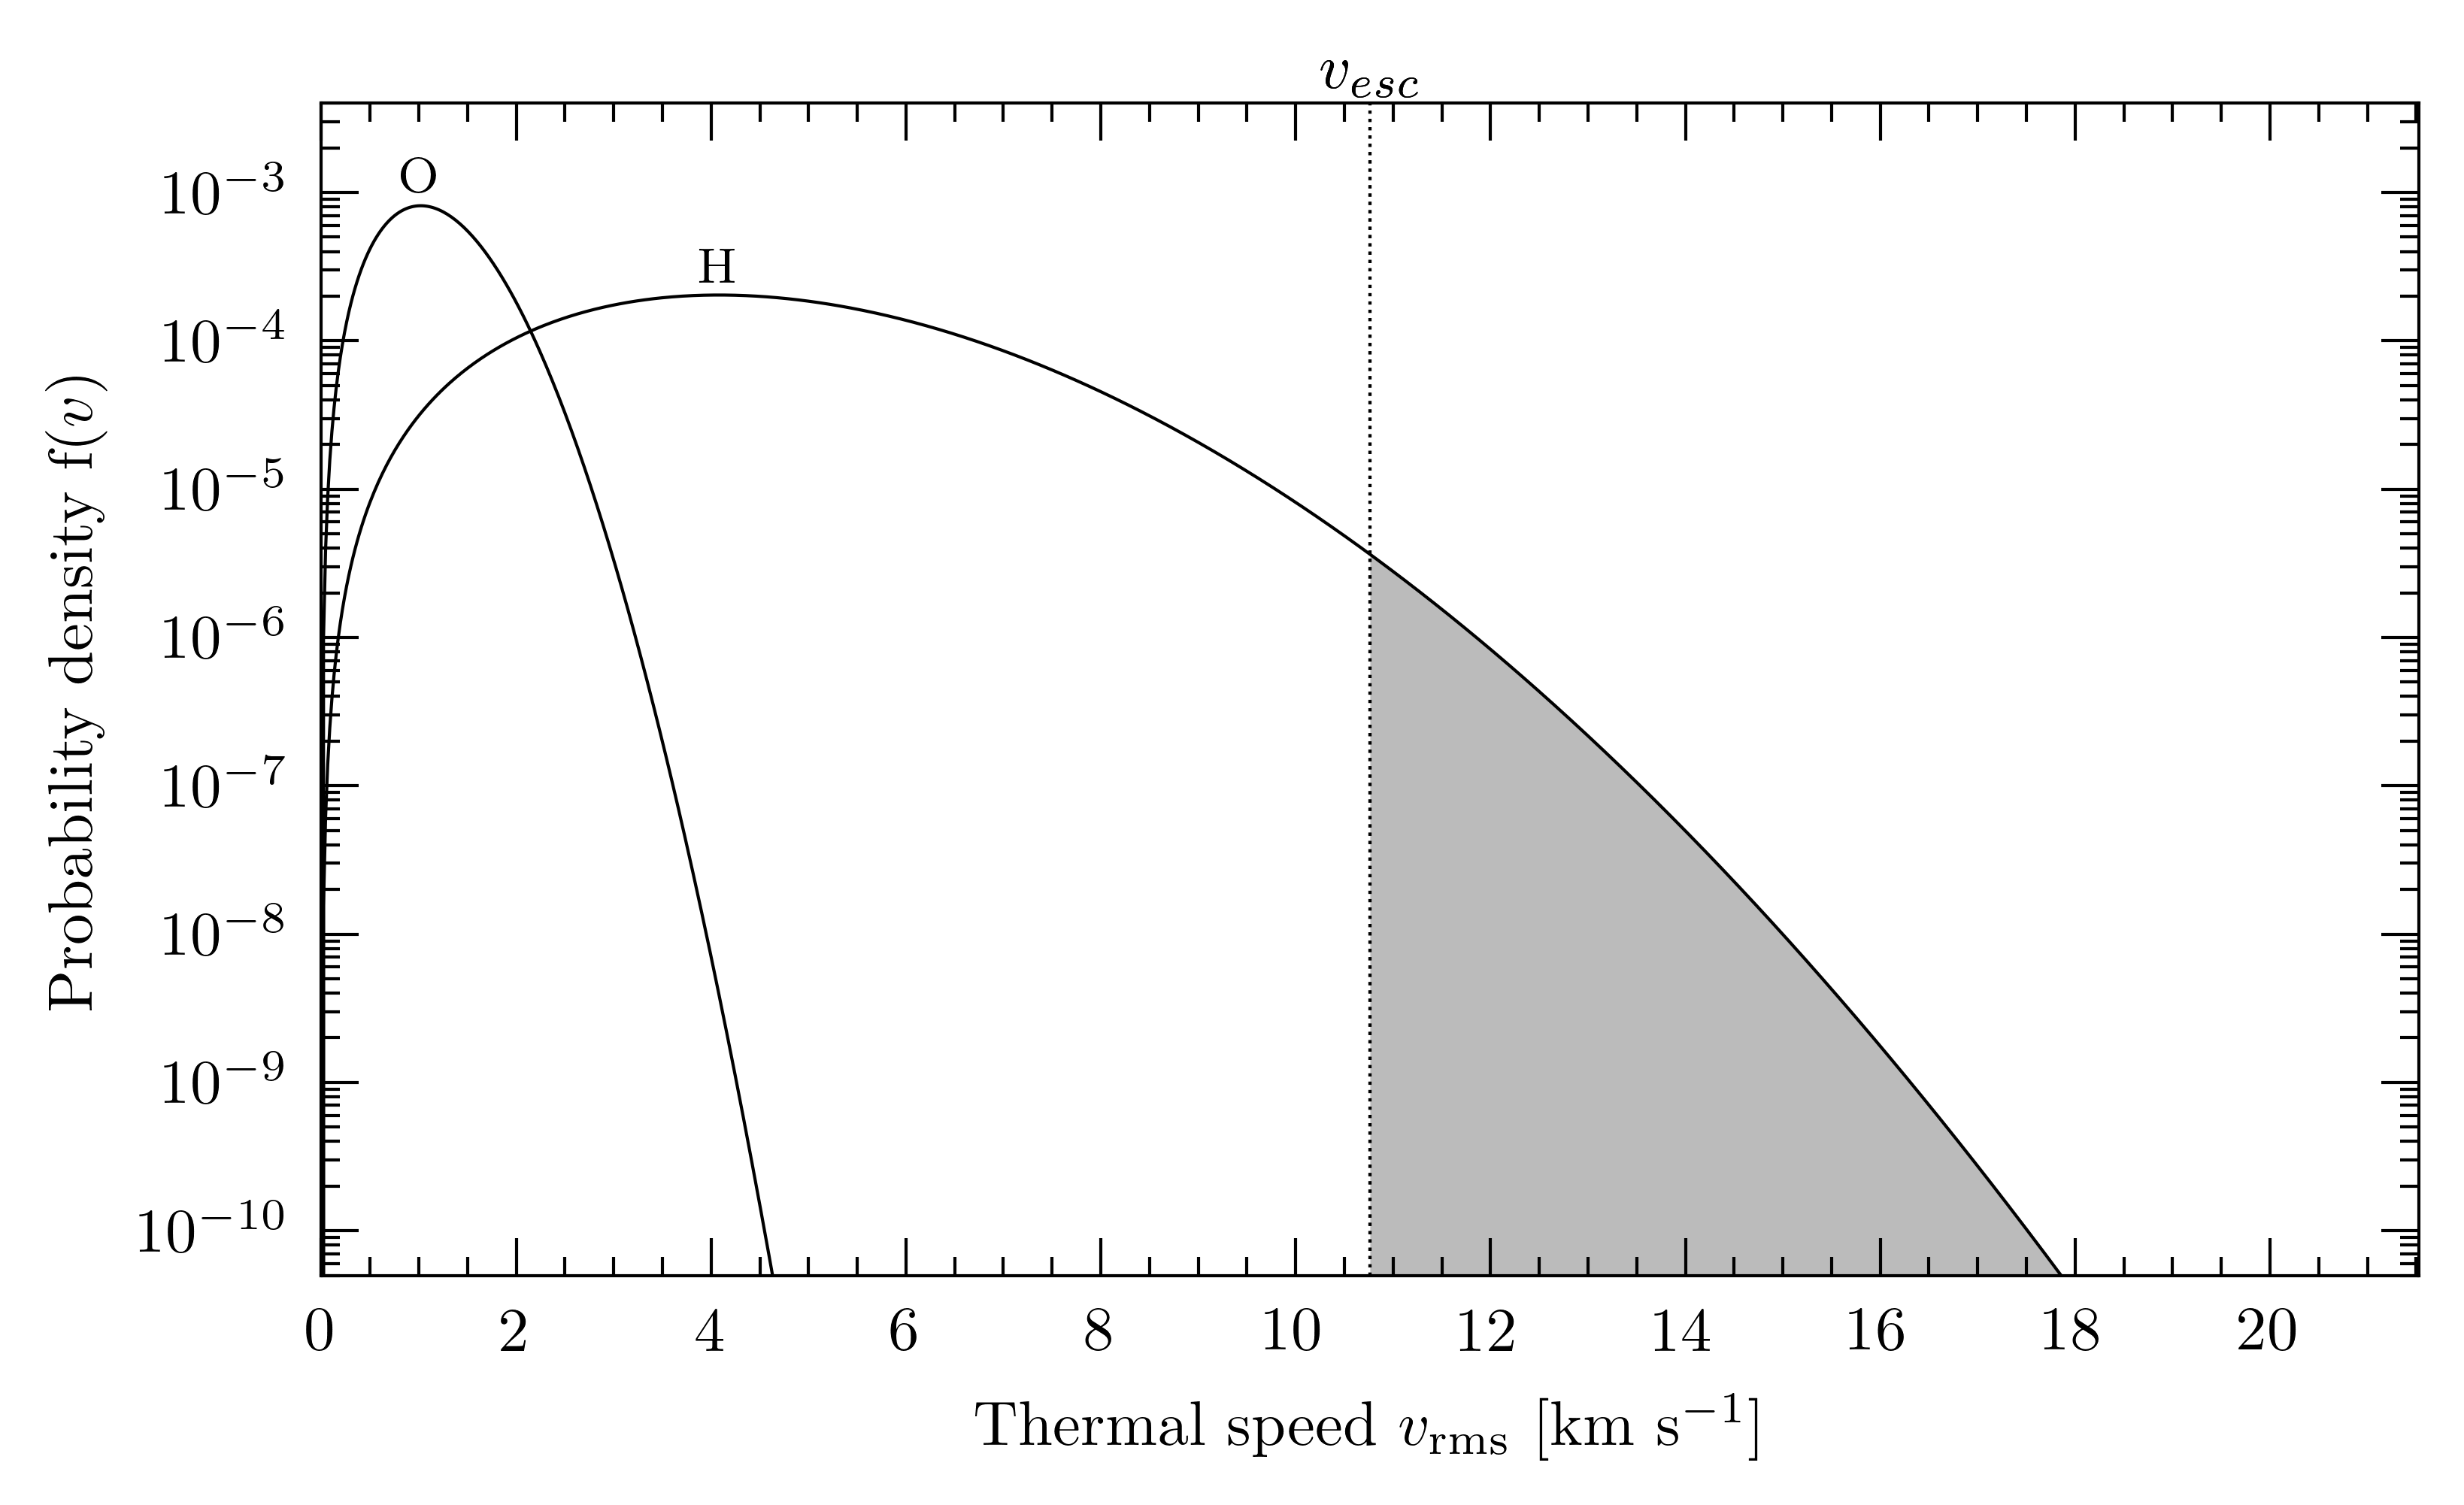

In [12]:
Texo = 1000.0 # temperature of the exobase in K
zexo = 500.0 # height of the exobase in km
Mp = 1.0 # Mearth
Rp = 1.0 # Rearth
nexo = 1.0e7 # exobase number density in particles/cm^3 

# species to compute and their molecular weights

species = ['H','O']
mu = {'H':1,'O':16}

# convert selected units into mks

zm = zexo*1000 # meters
GMp = GMe*Mp     # G*Mp in mks
Rpm = 1000.0*Rp*Re # radius of planet in meters

# compute escape speed at the exobase in km/s

vesc = math.sqrt(2*GMp/(Rpm+zm))/1000.0
print(f'v_esc = {vesc:.2f} km/s at exobase z={zexo:.1f} km')

# speeds to compute the M-B distribution

vMin = 0.0
vMax = 2*vesc
v = np.linspace(vMin,vMax,1000)

# compute the M-B distributions for each species of interest

mb = {}
vp = {}
for x in species:
    mb[x] = mbDist(v*1000,mu[x],Texo)        # convert v to m/s from km/s
    vp[x],va,vrms = mbSpeeds(mu[x],Texo)

    # some useful things to compute

    print(f'Species: {x}')
    print(f'   v_p = {vp[x]/1000:.2f} km/s')

    vevp = 1000*vesc/vp[x] # reconcile units differences: vesc in km/s and vpH in m/s
    print(f'   Vesc/Vp({x}) = {vevp:e}')
    jflux = 10e4*(nexo*100*vp[x]/(2*math.sqrt(math.pi)))*(1+vevp**2)*math.exp(-vevp**2) # 100*vp in cm/s to match nexo cm^-3
    print(f'   Jeans Flux: {jflux:e} particles/m^2/s')

# upper Y limit is 2x maximum M-B among the species, and then y min is 1e-6 of y max

mbMax = 4.0e-3 # 2.0*np.max([np.max(mb[x]) for x in species])
mbMin = 5.0e-11

# plotting bits

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(vMin,vMax)
ax.xaxis.set_major_locator(MultipleLocator(2.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_xlabel(r'Thermal speed $v_{\rm rms}$ [km s$^{-1}$]',fontsize=axisFontSize)


ax.set_ylim(mbMin,mbMax)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density f($v$)',fontsize=axisFontSize)

for x in species:
    ax.plot(v,mb[x],'-',color='black',lw=0.5,zorder=10)
    ax.text(vp[x]/1000,1.05*np.max(mb[x]),rf'{x}',va='bottom',ha='center',fontsize=labelFontSize)

    # vertical line for v>vesc

    ax.vlines(vesc,mbMin,mbMax,ls=[':'],colors=['black'],lw=0.5)
    ax.text(vesc,1.05*mbMax,r'$v_{esc}$',va='bottom',ha='center',fontsize=axisFontSize)

    ax.fill_betweenx(mb[x], v, vesc, where=v>vesc, facecolor='#bbbbbb')

plt.savefig(plotFile,bbox_inches='tight',facecolor='white')

plt.show()